Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle

# Load Dataset


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("emails.csv")

# Check data info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0

In [2]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [3]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

# Data Preprocessing

In [4]:
df.isnull().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [5]:
df.drop(columns='Email No.', inplace=True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [7]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [8]:
# Check for missing values and drop if any
df.dropna(inplace=True)

In [9]:
# The target column is likely 'Prediction' (1 = spam, 0 = not spam)
X = df.drop(['Prediction'], axis=1)
y = df['Prediction']

In [11]:
#Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

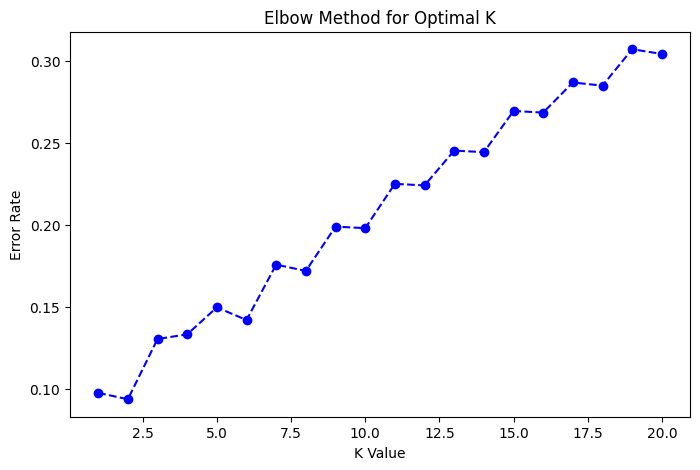

In [27]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


# Train K-Nearest Neighbors (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8695652173913043

KNN Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90       739
           1       0.71      0.93      0.80       296

    accuracy                           0.87      1035
   macro avg       0.84      0.89      0.85      1035
weighted avg       0.89      0.87      0.87      1035



# SVM

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9352657004830918

SVM Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       739
           1       0.87      0.91      0.89       296

    accuracy                           0.94      1035
   macro avg       0.92      0.93      0.92      1035
weighted avg       0.94      0.94      0.94      1035



# Comparison SVM vs KNN

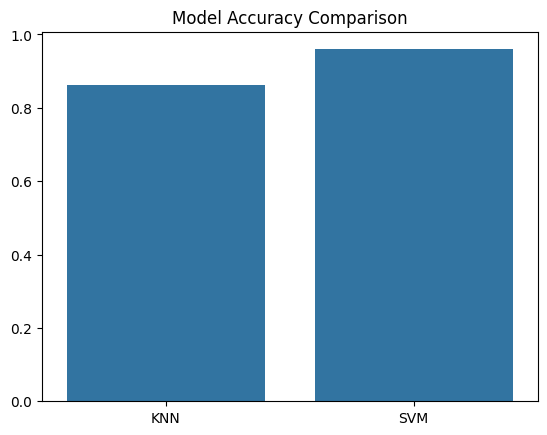

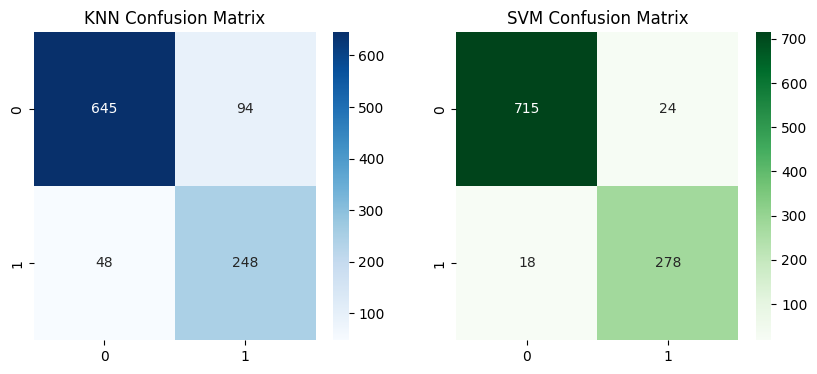

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Accuracy comparison
models = ['KNN', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.show()

# Confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("SVM Confusion Matrix")

plt.show()
